# Read kernel density

kernel density reflects the density of data distribution. It is similar to the so-called ray density.

In [1]:
from pytomoatt.data import ATTData
import numpy as np

In [2]:
# file to be read
input_file = 'OUTPUT_FILES/OUTPUT_FILES_fields/out_data_sim_group_0.h5'
# input parameters file
par_file = '3_input_params/input_params_inv.yaml'
# grid file
grid_file = 'OUTPUT_FILES/OUTPUT_FILES_fields/out_data_grid.h5'

# read sensitivity kernel
group   = "model"          # "src_$src_name"
dataset = "Kdensity_inv_0000"  # "T_res_inv_$iter"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()

# we can access 3D kernel related to slowness
tmp = data_field[dataset]
print("3D slowness kernel shape: ", tmp.shape)

# or we can interp it to a 2D slice at depth
depth = 0.0
tmp = data_field.interp_dep(depth, field=dataset)
longitude   = tmp[:,0]
latitude    = tmp[:,1]
Kden        = tmp[:,2]

# Similarly, we do the same process for smoothed kernel density
dataset = "Kdensity_update_inv_0000"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()
Kden_update = data_field.interp_dep(depth, field=dataset)[:,2]


3D slowness kernel shape:  (7, 201, 201)


# Pygmt kernel density

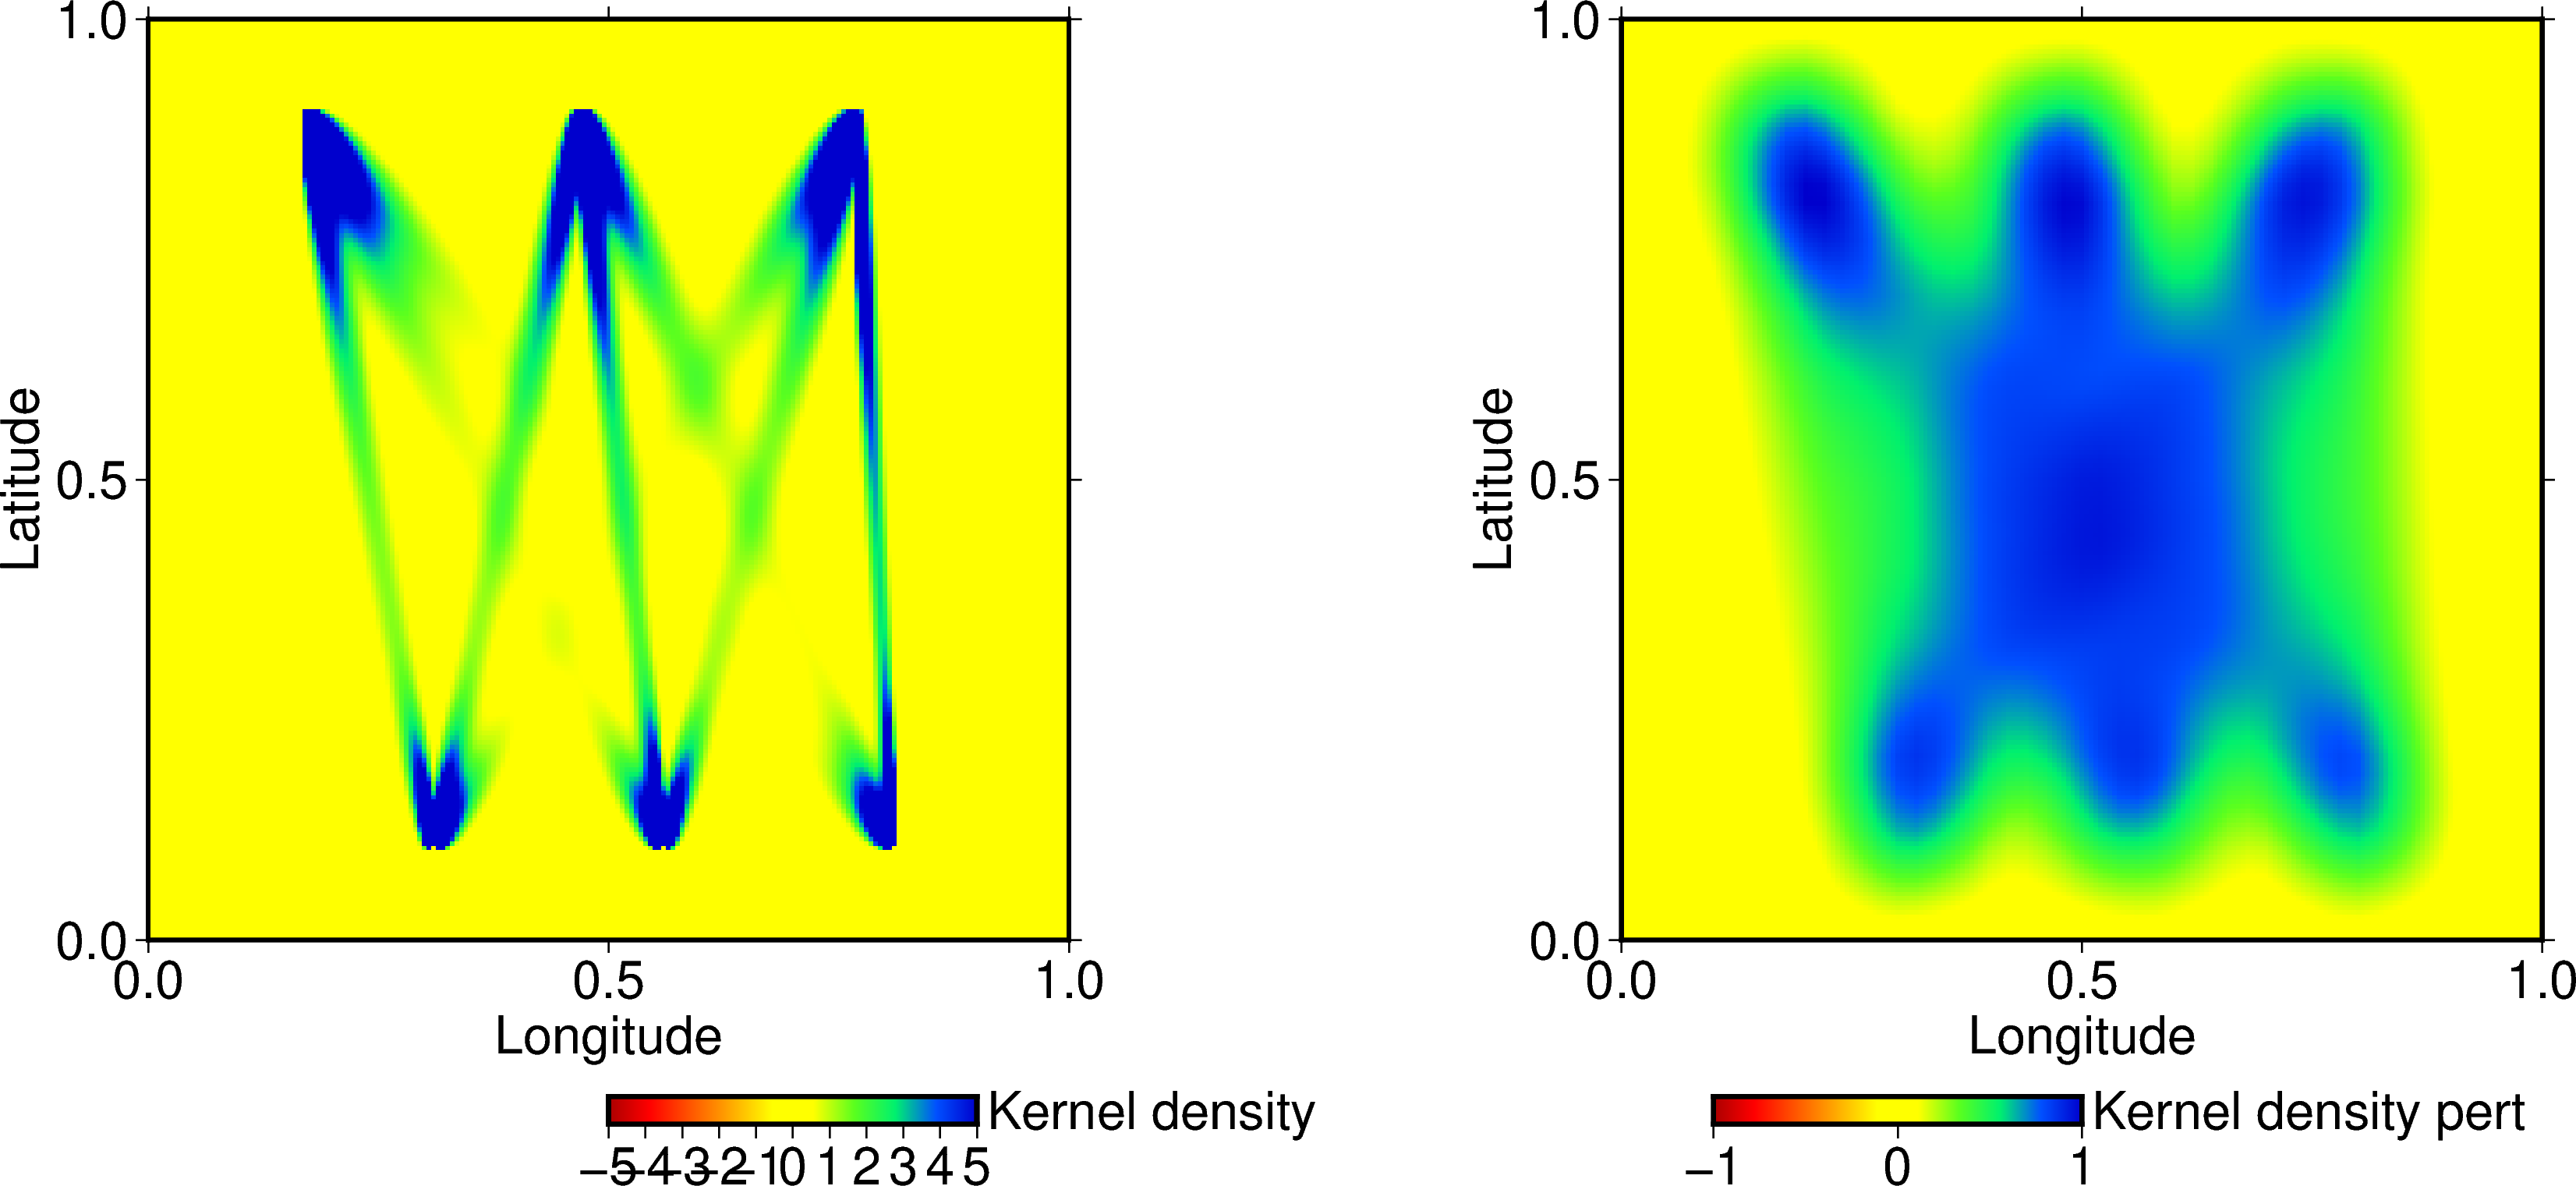

In [3]:
# pygmt plot
import pygmt
pygmt.config(FONT="16p", IO_SEGMENT_MARKER="<<<")


region = [0,1,0,1]
projection = "X10c/10c"
frame = ["xa0.5+lLongitude", "ya0.5+lLatitude", "nSWe"]

fig = pygmt.Figure()

# ----------- plot Ks field ------------
pygmt.makecpt(cmap="seis", series=[-5, 5], background=True, reverse=False)
grid = pygmt.xyz2grd(x=longitude, y=latitude, z=Kden, spacing=0.005,region=region,)
fig.grdimage(frame=frame,grid = grid,projection=projection, region=region) # nan_transparent may work

fig.shift_origin(xshift= 5, yshift=-2)
fig.colorbar(frame = ["a%f"%(1),"y+lKernel density"], position="+w4c/0.3c+h") # +e,默认是双箭头，f表示forward，b表示background ，w表示长宽，h表示水平
fig.shift_origin(xshift=-1, yshift=+2)


# ----------- plot Kxi field ------------
fig.shift_origin(xshift= 12,)
pygmt.makecpt(cmap="seis", series=[-1, 1], background=True, reverse=False)
grid = pygmt.xyz2grd(x=longitude, y=latitude, z=Kden_update, spacing=0.005,region=region,)
fig.grdimage(frame=frame,grid = grid,projection=projection, region=region) # nan_transparent may work

fig.shift_origin(xshift= 1, yshift=-2)
fig.colorbar(frame = ["a%f"%(1),"y+lKernel density pert"], position="+w4c/0.3c+h") # +e,默认是双箭头，f表示forward，b表示background ，w表示长宽，h表示水平
fig.shift_origin(xshift=-1, yshift=+2)

fig.show()
fig.savefig('img/5a_kernel_density.png')